In [61]:
!pip install ChannelAttribution

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.8/744.8 kB 8.8 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ChannelAttribution: filename=channelattribution-2.1.7-cp311-cp311-macosx_11_0_arm64.whl size=218899 sha256=878d3ae29b8f00bcc0ddf9fb40b07225f88e9de5d7b5d691c1c6d159923d8ea9
  Stored in directory: /Users/harshbhatt/Library/Caches/pip/wheels/d7/06/67/f358af0c04ed692a5cf80a59e8f4d65840b5848a66d27f80d3
Successfully built ChannelAttribution


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read Data

In [4]:
data = pd.read_csv("attribution data.csv")
data.shape

(586737, 6)

In [5]:
data.head()

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search


In [6]:
len(data["cookie"].unique())

240108

In [7]:
len(data[data["conversion"] == 1]["cookie"].unique())

17639

In [8]:
data["interaction"].value_counts()

interaction
impression    569098
conversion     17639
Name: count, dtype: int64

In [9]:
data["time"] = pd.to_datetime(data["time"])

In [10]:
data.head()

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03 13:02:11+00:00,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17 19:15:07+00:00,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24 15:51:46+00:00,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29 07:44:51+00:00,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03 09:44:57+00:00,impression,0,0.0,Paid Search


In [11]:
journey_df = data.groupby(by = ["cookie"]).apply(
    lambda x: {
        "channels": list(x["channel"]),
        "converted": x["conversion"].max(),
        "conversion_value": x["conversion_value"].sum()
    }
).reset_index()

/var/folders/x6/npt_81hx5z118fvsw6w6qh900000gn/T/ipykernel_60859/780812095.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  journey_df = data.groupby(by = ["cookie"]).apply(


In [12]:
journey_df.head()

,cookie,0
0,00000FkCnDfDDf0iC97iC703B,"{'channels': ['Instagram', 'Online Display', '..."
1,0000nACkD9nFkBBDECD3ki00E,"{'channels': ['Paid Search', 'Paid Search', 'P..."
2,0003EfE37E93D0BC03iBhBBhF,"{'channels': ['Paid Search', 'Paid Search', 'P..."
3,00073CFE3FoFCn70fBhB3kfon,"{'channels': ['Instagram'], 'converted': 0, 'c..."
4,00079hhBkDF3k3kDkiFi9EFAD,"{'channels': ['Paid Search'], 'converted': 0, ..."


In [13]:
journey_df["channels"] = journey_df[0].apply(lambda x: x["channels"])
journey_df["converted"] = journey_df[0].apply(lambda x: x["converted"])
journey_df["conversion_value"] = journey_df[0].apply(lambda x: x["conversion_value"])

In [14]:
journey_df.drop(columns = [0], inplace = True)
journey_df.head()

,cookie,channels,converted,conversion_value
0,00000FkCnDfDDf0iC97iC703B,"[Instagram, Online Display, Online Display, On...",0,0.0
1,0000nACkD9nFkBBDECD3ki00E,"[Paid Search, Paid Search, Paid Search, Paid S...",0,0.0
2,0003EfE37E93D0BC03iBhBBhF,"[Paid Search, Paid Search, Paid Search, Paid S...",0,0.0
3,00073CFE3FoFCn70fBhB3kfon,[Instagram],0,0.0
4,00079hhBkDF3k3kDkiFi9EFAD,[Paid Search],0,0.0


# Baseline attribution - Manual

### Last touch

In [15]:
def last_touch_attr(journey):
    return journey["channels"][-1] if journey["converted"] == 1 else None

In [16]:
journey_df["last_touch"] = journey_df.apply(last_touch_attr, axis = 1)

In [17]:
journey_df[journey_df["converted"] == 1].head()

,cookie,channels,converted,conversion_value,last_touch
7,0007oEBhnoF97AoEE3BCkFnhB,[Paid Search],1,6.5,Paid Search
8,00090n9EBBEkA000C7Cik999D,[Facebook],1,8.0,Facebook
34,000h3n9nC0hFhE3CCnkkAof7n,[Facebook],1,6.0,Facebook
36,000hCBnCB7oi7ADAEnEBCnBEE,"[Online Video, Online Video, Online Video, Onl...",1,6.5,Online Video
44,000kiDB3D0fCfDAohCDB3ohko,"[Facebook, Facebook]",1,7.5,Facebook


### First touch

In [18]:
def first_touch_attr(journey):
    return journey["channels"][0] if journey["converted"] == 1 else None

In [19]:
journey_df["first_touch"] = journey_df.apply(first_touch_attr, axis = 1)

In [20]:
journey_df[journey_df["converted"] == 1].head()

,cookie,channels,converted,conversion_value,last_touch,first_touch
7,0007oEBhnoF97AoEE3BCkFnhB,[Paid Search],1,6.5,Paid Search,Paid Search
8,00090n9EBBEkA000C7Cik999D,[Facebook],1,8.0,Facebook,Facebook
34,000h3n9nC0hFhE3CCnkkAof7n,[Facebook],1,6.0,Facebook,Facebook
36,000hCBnCB7oi7ADAEnEBCnBEE,"[Online Video, Online Video, Online Video, Onl...",1,6.5,Online Video,Online Video
44,000kiDB3D0fCfDAohCDB3ohko,"[Facebook, Facebook]",1,7.5,Facebook,Facebook


### Linear attribution

In [21]:
from collections import Counter

def linear_attribution(journey):
    if journey['converted']:
        n = len(journey['channels'])
        return Counter({ch: 1/n for ch in journey['channels']})
    return Counter()

In [22]:
journey_df['linear'] = journey_df.apply(linear_attribution, axis=1)

In [23]:
journey_df[journey_df["converted"] == 1].head()

,cookie,channels,converted,conversion_value,last_touch,first_touch,linear
7,0007oEBhnoF97AoEE3BCkFnhB,[Paid Search],1,6.5,Paid Search,Paid Search,{'Paid Search': 1.0}
8,00090n9EBBEkA000C7Cik999D,[Facebook],1,8.0,Facebook,Facebook,{'Facebook': 1.0}
34,000h3n9nC0hFhE3CCnkkAof7n,[Facebook],1,6.0,Facebook,Facebook,{'Facebook': 1.0}
36,000hCBnCB7oi7ADAEnEBCnBEE,"[Online Video, Online Video, Online Video, Onl...",1,6.5,Online Video,Online Video,"{'Online Video': 0.041666666666666664, 'Instag..."
44,000kiDB3D0fCfDAohCDB3ohko,"[Facebook, Facebook]",1,7.5,Facebook,Facebook,{'Facebook': 0.5}


### U/W attribution

In [24]:
def position_based(journey, weights=(0.4, 0.2, 0.4)):
    if journey['converted']:
        n = len(journey['channels'])
        if n == 1:
            return Counter({journey['channels'][0]: 1.0})
        elif n == 2:
            return Counter({journey['channels'][0]: 0.5, journey['channels'][1]: 0.5})
        else:
            first, last = journey['channels'][0], journey['channels'][-1]
            middle = journey['channels'][1:-1]
            c = Counter({first: weights[0], last: weights[2]})
            for m in middle:
                c[m] += weights[1] / len(middle)
            return c
    return Counter()

In [25]:
journey_df["position"] = journey_df.apply(position_based, axis = 1)

In [26]:
journey_df[journey_df["converted"] == 1].head()

,cookie,channels,converted,conversion_value,last_touch,first_touch,linear,position
7,0007oEBhnoF97AoEE3BCkFnhB,[Paid Search],1,6.5,Paid Search,Paid Search,{'Paid Search': 1.0},{'Paid Search': 1.0}
8,00090n9EBBEkA000C7Cik999D,[Facebook],1,8.0,Facebook,Facebook,{'Facebook': 1.0},{'Facebook': 1.0}
34,000h3n9nC0hFhE3CCnkkAof7n,[Facebook],1,6.0,Facebook,Facebook,{'Facebook': 1.0},{'Facebook': 1.0}
36,000hCBnCB7oi7ADAEnEBCnBEE,"[Online Video, Online Video, Online Video, Onl...",1,6.5,Online Video,Online Video,"{'Online Video': 0.041666666666666664, 'Instag...","{'Online Video': 0.5909090909090904, 'Instagra..."
44,000kiDB3D0fCfDAohCDB3ohko,"[Facebook, Facebook]",1,7.5,Facebook,Facebook,{'Facebook': 0.5},{'Facebook': 0.5}


## Markov chain attribution

In [27]:
mma_df = data.sort_values(by = ["cookie", "time"], ascending = [False, True])
mma_df['visit_order'] = mma_df.groupby('cookie').cumcount() + 1
mma_df.head()

,cookie,time,interaction,conversion,conversion_value,channel,visit_order
586736,ooooohAFofEnonEikhAi3fF9o,2018-07-14 17:17:12+00:00,impression,0,0.0,Paid Search,1
586734,ooooiBh70D3k3BfAhDFfii9h7,2018-07-03 12:57:25+00:00,impression,0,0.0,Paid Search,1
586735,ooooiBh70D3k3BfAhDFfii9h7,2018-07-19 08:17:59+00:00,impression,0,0.0,Online Video,2
586731,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-06 23:30:38+00:00,impression,0,0.0,Online Display,1
586732,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12 23:50:45+00:00,impression,0,0.0,Online Display,2


In [28]:
df_last_interaction = mma_df.drop_duplicates("cookie", keep = "last")[["cookie", "conversion"]]
df_last_interaction.head()

,cookie,conversion
586736,ooooohAFofEnonEikhAi3fF9o,0
586735,ooooiBh70D3k3BfAhDFfii9h7,0
586733,ooooEiB0CCoEf9fiiC90Dfhfk,0
586730,ooooEBE0o0D97ACAAAnDoi3F0,0
586729,ooooE0hkAFBkED90ChDDiBFAf,0


In [29]:
df_paths = pd.merge(mma_df, df_last_interaction, how='left', on='cookie')
df_paths.head()

,cookie,time,interaction,conversion_x,conversion_value,channel,visit_order,conversion_y
0,ooooohAFofEnonEikhAi3fF9o,2018-07-14 17:17:12+00:00,impression,0,0.0,Paid Search,1,0
1,ooooiBh70D3k3BfAhDFfii9h7,2018-07-03 12:57:25+00:00,impression,0,0.0,Paid Search,1,0
2,ooooiBh70D3k3BfAhDFfii9h7,2018-07-19 08:17:59+00:00,impression,0,0.0,Online Video,2,0
3,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-06 23:30:38+00:00,impression,0,0.0,Online Display,1,0
4,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12 23:50:45+00:00,impression,0,0.0,Online Display,2,0


In [30]:
df_paths["prev_step"] = df_paths.groupby(by = "cookie")["channel"].shift(1)
df_paths["next_step"] = df_paths.groupby(by = "cookie")["channel"].shift(-1)
df_paths.head(10)

,cookie,time,interaction,conversion_x,conversion_value,channel,visit_order,conversion_y,prev_step,next_step
0,ooooohAFofEnonEikhAi3fF9o,2018-07-14 17:17:12+00:00,impression,0,0.0,Paid Search,1,0,NaN,NaN
1,ooooiBh70D3k3BfAhDFfii9h7,2018-07-03 12:57:25+00:00,impression,0,0.0,Paid Search,1,0,NaN,Online Video
2,ooooiBh70D3k3BfAhDFfii9h7,2018-07-19 08:17:59+00:00,impression,0,0.0,Online Video,2,0,Paid Search,NaN
3,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-06 23:30:38+00:00,impression,0,0.0,Online Display,1,0,NaN,Online Display
4,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12 23:50:45+00:00,impression,0,0.0,Online Display,2,0,Online Display,Online Display
5,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12 23:50:54+00:00,impression,0,0.0,Online Display,3,0,Online Display,NaN
6,ooooEBE0o0D97ACAAAnDoi3F0,2018-07-25 20:02:08+00:00,impression,0,0.0,Online Display,1,0,NaN,NaN
7,ooooE0hkAFBkED90ChDDiBFAf,2018-07-03 13:36:19+00:00,impression,0,0.0,Online Display,1,0,NaN,NaN
8,ooooAnkko0k0Dfino0oDkEoEi,2018-07-21 17:43:44+00:00,impression,0,0.0,Paid Search,1,0,NaN,Online Display
9,ooooAnkko0k0Dfino0oDkEoEi,2018-07-29 11:55:41+00:00,impression,0,0.0,Online Display,2,0,Paid Search,NaN


In [31]:
def fillna_next_step(row):
    if pd.isna(row["next_step"]):
        if row["conversion_y"] == 1:
            return "Conversion"
        else:
            return "No_Conv"
    else:
        return row["next_step"]

In [32]:
df_paths["next_step"] = df_paths.apply(lambda row: fillna_next_step(row), axis = 1)
df_paths["prev_step"] = df_paths["prev_step"].fillna("Start")
df_paths.head()

,cookie,time,interaction,conversion_x,conversion_value,channel,visit_order,conversion_y,prev_step,next_step
0,ooooohAFofEnonEikhAi3fF9o,2018-07-14 17:17:12+00:00,impression,0,0.0,Paid Search,1,0,Start,No_Conv
1,ooooiBh70D3k3BfAhDFfii9h7,2018-07-03 12:57:25+00:00,impression,0,0.0,Paid Search,1,0,Start,Online Video
2,ooooiBh70D3k3BfAhDFfii9h7,2018-07-19 08:17:59+00:00,impression,0,0.0,Online Video,2,0,Paid Search,No_Conv
3,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-06 23:30:38+00:00,impression,0,0.0,Online Display,1,0,Start,Online Display
4,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12 23:50:45+00:00,impression,0,0.0,Online Display,2,0,Online Display,Online Display


In [33]:
def join_steps(prev_step, next_step):
    return f"{prev_step} > {next_step}"

In [34]:
def make_path(prev_step, channel, next_step):
    if prev_step == "Start":
        if next_step == "No_Conv" or next_step == "Conversion":
            return f"{prev_step} > {channel} > {next_step}"
        else:
            return f"{prev_step} > {channel} > "
    else:
        if next_step == "No_Conv" or next_step == "Conversion":
            return f"{channel} > {next_step}"
        else:
            return f"{channel} > "

In [35]:
df_paths["path"] = df_paths.apply(lambda row: make_path(row["prev_step"], row["channel"], row["next_step"]), axis = 1)
df_paths.head()

,cookie,time,interaction,conversion_x,conversion_value,channel,visit_order,conversion_y,prev_step,next_step,path
0,ooooohAFofEnonEikhAi3fF9o,2018-07-14 17:17:12+00:00,impression,0,0.0,Paid Search,1,0,Start,No_Conv,Start > Paid Search > No_Conv
1,ooooiBh70D3k3BfAhDFfii9h7,2018-07-03 12:57:25+00:00,impression,0,0.0,Paid Search,1,0,Start,Online Video,Start > Paid Search >
2,ooooiBh70D3k3BfAhDFfii9h7,2018-07-19 08:17:59+00:00,impression,0,0.0,Online Video,2,0,Paid Search,No_Conv,Online Video > No_Conv
3,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-06 23:30:38+00:00,impression,0,0.0,Online Display,1,0,Start,Online Display,Start > Online Display >
4,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12 23:50:45+00:00,impression,0,0.0,Online Display,2,0,Online Display,Online Display,Online Display >


In [36]:
full_path_df = (df_paths
                .groupby(by = ["cookie"])#["path"]
                .agg({"conversion_value": "sum",
                      "conversion_x": "sum",
                      "path": "sum"})
                #.apply(lambda x: " > ".join(x)).sort_index()
                .reset_index()
                )
full_path_df.head()

,cookie,conversion_value,conversion_x,path
0,00000FkCnDfDDf0iC97iC703B,0.0,0,Start > Instagram > Online Display > Online Di...
1,0000nACkD9nFkBBDECD3ki00E,0.0,0,Start > Paid Search > Paid Search > Paid Searc...
2,0003EfE37E93D0BC03iBhBBhF,0.0,0,Start > Paid Search > Paid Search > Paid Searc...
3,00073CFE3FoFCn70fBhB3kfon,0.0,0,Start > Instagram > No_Conv
4,00079hhBkDF3k3kDkiFi9EFAD,0.0,0,Start > Paid Search > No_Conv


In [37]:
path_df = full_path_df.drop(columns = ["cookie"])
path_df["path"] = path_df["path"].apply(lambda x: x.replace("Start > ", ""))
path_df["path"] = path_df["path"].apply(lambda x: x.replace(" > No_Conv", ""))
path_df["path"] = path_df["path"].apply(lambda x: x.replace(" > Conversion", ""))
path_df.head()

,conversion_value,conversion_x,path
0,0.0,0,Instagram > Online Display > Online Display > ...
1,0.0,0,Paid Search > Paid Search > Paid Search > Paid...
2,0.0,0,Paid Search > Paid Search > Paid Search > Paid...
3,0.0,0,Instagram
4,0.0,0,Paid Search


In [38]:
path_df = path_df.groupby(by = ["path"]).agg({"conversion_value": "sum", "conversion_x": ["count","sum"]}).reset_index()
path_df.head()

path conversion_value  \
                                                                  sum   
0                                           Facebook          12857.0   
1                                Facebook > Facebook           3295.0   
2                     Facebook > Facebook > Facebook           1458.0   
3          Facebook > Facebook > Facebook > Facebook            542.5   
4  Facebook > Facebook > Facebook > Facebook > Fa...            255.5   

  conversion_x        
         count   sum  
0        34856  2054  
1         7948   538  
2         2296   230  
3          836    85  
4          359    41

In [39]:
new_columns = ["path", "total_conversion_value", "total_counts", "total_conversions"]
path_df.columns = new_columns
path_df.head()

,path,total_conversion_value,total_counts,total_conversions
0,Facebook,12857.0,34856,2054
1,Facebook > Facebook,3295.0,7948,538
2,Facebook > Facebook > Facebook,1458.0,2296,230
3,Facebook > Facebook > Facebook > Facebook,542.5,836,85
4,Facebook > Facebook > Facebook > Facebook > Fa...,255.5,359,41


In [40]:
path_df["total_nulls"] = path_df["total_counts"] - path_df["total_conversions"]
# path_df.drop(columns = ["total_counts"], inplace = True)
path_df.head()

,path,total_conversion_value,total_counts,total_conversions,total_nulls
0,Facebook,12857.0,34856,2054,32802
1,Facebook > Facebook,3295.0,7948,538,7410
2,Facebook > Facebook > Facebook,1458.0,2296,230,2066
3,Facebook > Facebook > Facebook > Facebook,542.5,836,85,751
4,Facebook > Facebook > Facebook > Facebook > Fa...,255.5,359,41,318


# Attribution using ChannelAttribution library

In [41]:
from ChannelAttribution import *

*** Looking to run more advanced attribution? Try ChannelAttribution Pro for free! Visit https://channelattribution.io/product
Version: 2.1.7


In [42]:
H = heuristic_models(path_df, "path", "total_conversions", var_value="total_conversion_value")
H

*** Looking to run more advanced attribution? Try ChannelAttribution Pro for free! Visit https://channelattribution.io/product


,channel_name,first_touch_conversions,first_touch_value,last_touch_conversions,last_touch_value,linear_touch_conversions,linear_touch_value
0,Facebook,5177.0,32283.0,5301.0,33143.5,5218.903371,32614.300094
1,Instagram,2329.0,14579.5,2244.0,14039.5,2265.179353,14171.723842
2,Online Display,2160.0,13419.0,2139.0,13298.5,2124.315256,13205.187068
3,Online Video,3216.0,20225.5,3408.0,21418.0,3349.403371,21045.330408
4,Paid Search,4757.0,29724.0,4547.0,28331.5,4681.198650,29194.458588


In [43]:
M = markov_model(path_df, "path", "total_conversions", var_value="total_conversion_value")
M

Number of simulations: 100000 - Convergence reached: 1.58% < 5.00%
Percentage of simulated paths that successfully end before maximum number of steps (48) is reached: 99.99%
*** Looking to run more advanced attribution? Try ChannelAttribution Pro for free! Visit https://channelattribution.io/product


,channel_name,total_conversions,total_conversion_value
0,Facebook,5258.017942,32826.061993
1,Instagram,3471.060425,21711.207332
2,Online Video,2877.668461,18065.749695
3,Paid Search,3984.203191,24861.580609
4,Online Display,2048.049981,12766.400371


In [44]:
att_df = pd.merge(left=H, right=M, on="channel_name")
att_df

,channel_name,first_touch_conversions,first_touch_value,last_touch_conversions,last_touch_value,linear_touch_conversions,linear_touch_value,total_conversions,total_conversion_value
0,Facebook,5177.0,32283.0,5301.0,33143.5,5218.903371,32614.300094,5258.017942,32826.061993
1,Instagram,2329.0,14579.5,2244.0,14039.5,2265.179353,14171.723842,3471.060425,21711.207332
2,Online Display,2160.0,13419.0,2139.0,13298.5,2124.315256,13205.187068,2048.049981,12766.400371
3,Online Video,3216.0,20225.5,3408.0,21418.0,3349.403371,21045.330408,2877.668461,18065.749695
4,Paid Search,4757.0,29724.0,4547.0,28331.5,4681.198650,29194.458588,3984.203191,24861.580609


In [45]:
att_df.rename(columns = {"total_conversions": "mma_conversions", "total_conversion_value": "mma_conversion_value"}, inplace = True)

In [46]:
att_df.head()

,channel_name,first_touch_conversions,first_touch_value,last_touch_conversions,last_touch_value,linear_touch_conversions,linear_touch_value,mma_conversions,mma_conversion_value
0,Facebook,5177.0,32283.0,5301.0,33143.5,5218.903371,32614.300094,5258.017942,32826.061993
1,Instagram,2329.0,14579.5,2244.0,14039.5,2265.179353,14171.723842,3471.060425,21711.207332
2,Online Display,2160.0,13419.0,2139.0,13298.5,2124.315256,13205.187068,2048.049981,12766.400371
3,Online Video,3216.0,20225.5,3408.0,21418.0,3349.403371,21045.330408,2877.668461,18065.749695
4,Paid Search,4757.0,29724.0,4547.0,28331.5,4681.198650,29194.458588,3984.203191,24861.580609


In [72]:
att_df.to_csv("channel_conversions.csv", index=False, header=True)

In [49]:
import plotly.express as px
import plotly.io as pio

In [50]:
R=pd.merge(H,M,on="channel_name",how="inner")
R1=R[["channel_name","first_touch_conversions","last_touch_conversions",\
"linear_touch_conversions","total_conversions"]]
R1.columns=["channel_name","first_touch","last_touch","linear_touch","markov_model"]

R1=pd.melt(R1, id_vars="channel_name")

data = [dict(type = "histogram", histfunc="sum",x = R1.channel_name, y = R1.value,
             transforms = [dict(type = "groupby", groups = R1.variable,)],)]

fig = dict({"data":data}) 
pio.show(fig,validate=False)

In [51]:
R2=R[["channel_name","first_touch_value","last_touch_value",\
"linear_touch_value","total_conversion_value"]]
R2.columns=["channel_name","first_touch","last_touch","linear_touch","markov_model"]

R2=pd.melt(R2, id_vars="channel_name")
data = [dict(type = "histogram", histfunc="sum", x = R2.channel_name, y = R2.value,
             transforms = [dict(type = "groupby",groups = R2.variable,)],)]

fig = dict({"data":data})
pio.show(fig,validate=False)

In [52]:
transition_matrix = transition_matrix(path_df, "path", "total_conversions", var_null="total_nulls")

*** Looking to run more advanced attribution? Try ChannelAttribution Pro for free! Visit https://channelattribution.io/product


In [53]:
matrix = transition_matrix['transition_matrix']
matrix = pd.pivot_table(matrix, values='transition_probability', index=['channel_from'],
                    columns=['channel_to'], aggfunc=np.sum)

column_dict = transition_matrix['channels'].set_index('id_channel')['channel_name'].to_dict()
keys_values = column_dict.items()
column_dict = {str(key): str(value) for key, value in keys_values}

matrix = matrix.rename(mapper=column_dict, axis=1).rename(mapper=column_dict, axis=0)
matrix.fillna(0, inplace = True)

/var/folders/x6/npt_81hx5z118fvsw6w6qh900000gn/T/ipykernel_60859/399240610.py:2: FutureWarning:

The provided callable <function sum at 0x1063d6840> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, '(conversion)'),
  Text(1.5, 0, '(null)'),
  Text(2.5, 0, 'Facebook'),
  Text(3.5, 0, 'Instagram'),
  Text(4.5, 0, 'Online Display'),
  Text(5.5, 0, 'Online Video'),
  Text(6.5, 0, 'Paid Search')])

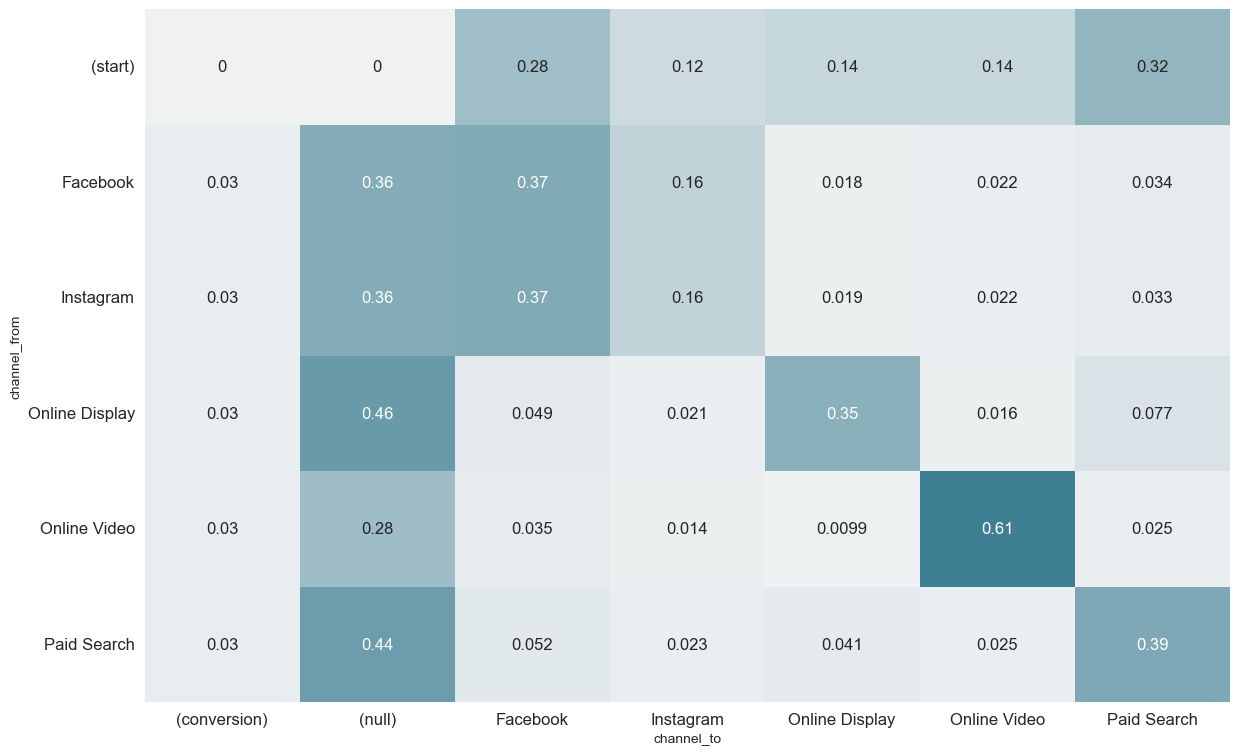

In [54]:
#Heat map for transition probabilities in the data set
fig = plt.figure(figsize = (14,9))
sns.set_style('whitegrid')

sns.heatmap(matrix, cmap=sns.diverging_palette(20, 220, n=200), annot=True, center = 0,\
            annot_kws={'size':12}, cbar=False)
plt.yticks(rotation=0, fontsize = 12)
plt.xticks(fontsize = 12)

In [55]:
conv_cols = [c for c in att_df.columns if "conversions" in c]
val_cols = [c for c in att_df.columns if "value" in c]

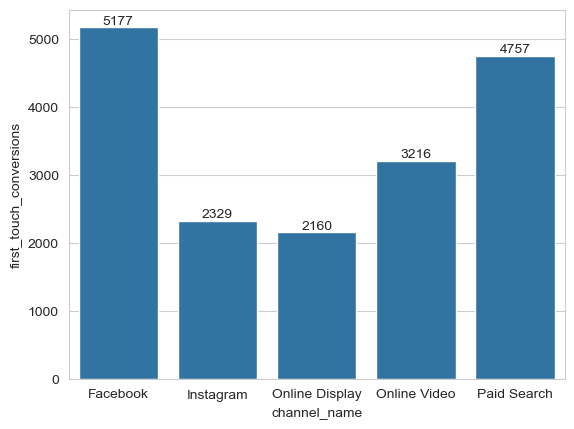

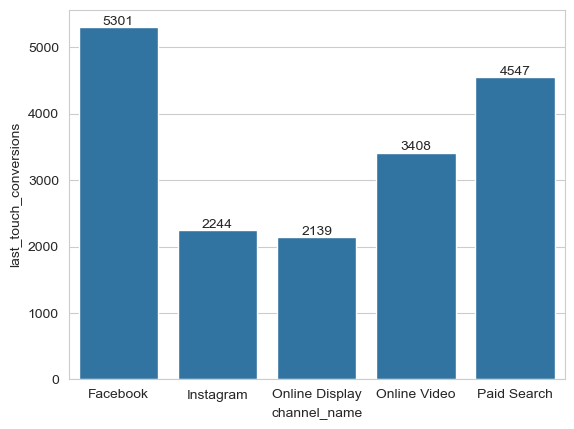

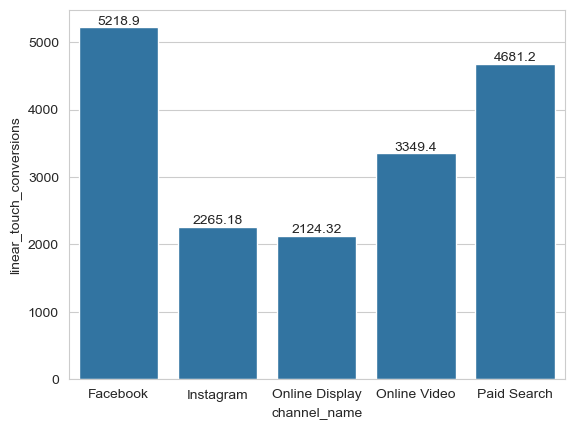

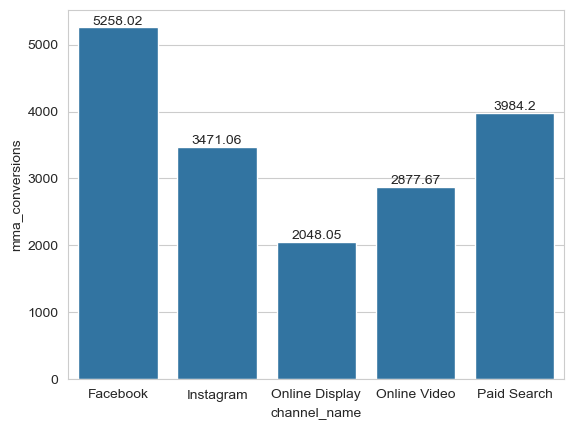

In [56]:
for c in conv_cols:
    ax = sns.barplot(x='channel_name', y=c, data=att_df)
    ax.bar_label(ax.containers[0])
    plt.show()

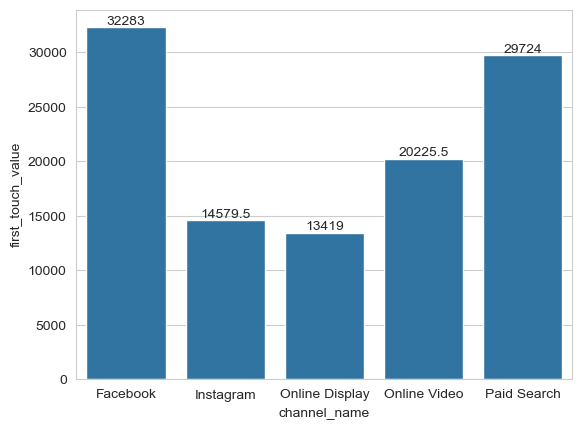

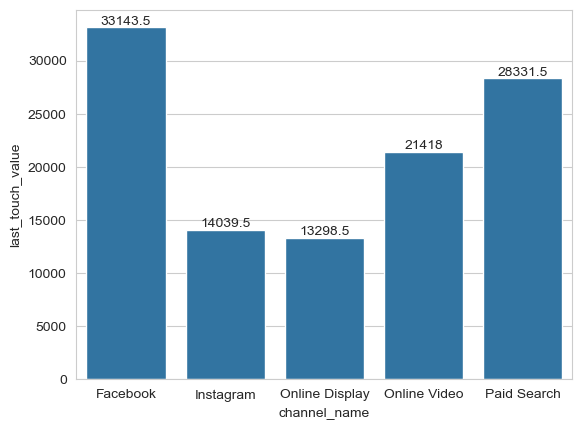

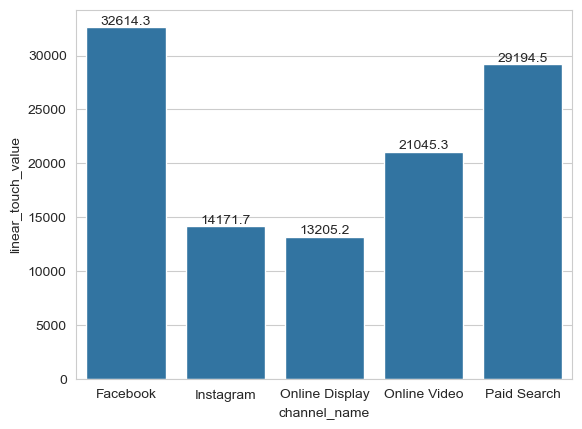

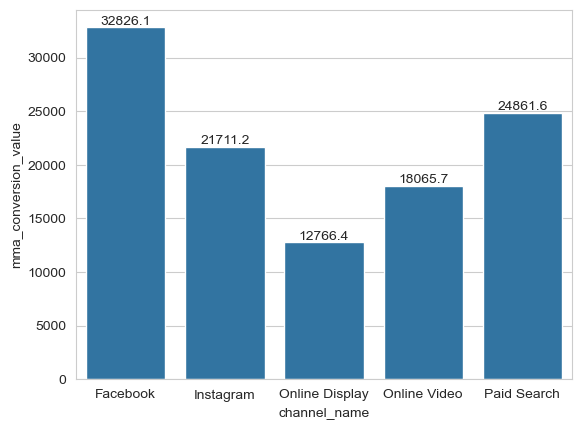

In [57]:
for c in val_cols:
    ax = sns.barplot(x='channel_name', y=c, data=att_df)
    ax.bar_label(ax.containers[0])
    plt.show()

# Optimization

In [58]:
from scipy.optimize import minimize

In [59]:
att_df["rates"] = np.array([0.0002, 0.0001, 0.00007, 0.00007, 0.00025])

In [76]:
att_df.loc[att_df["channel_name"] == "Facebook"]["rates"].values[0]

0.0002

In [64]:
# Attribution results (e.g., conversions or ROI per channel)
channels = att_df["channel_name"].to_list()
conversions = att_df["mma_conversions"].to_list() # MMA conversions
attributions = [np.round(c / 100,2) for c in conversions]
rates = np.array(att_df["rates"].to_list())

In [65]:
# Total budget
budget_total = 10000

In [66]:
# Objective: maximize total attributed conversions (linear model)
def lin_objective(x):
    # Negative sign because minimize() minimizes, but we want to maximize
    return -np.sum(attributions * (x / budget_total))

In [67]:
def non_lin_objective(x):
    # x is budget allocation array
    return -np.sum(attributions * (1 - np.exp(-rates * x)))

In [ ]:
def allocate_budget(objective, budget_total = 10000):
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - budget_total})

    # Bounds: no negative allocations, no channel gets more than total budget
    bounds = [(0, budget_total) for _ in channels]

    # Initial guess: equal allocation
    x0 = np.array([budget_total / len(channels)] * len(channels))

    # Solve
    result = minimize(objective, x0, bounds=bounds, constraints=constraints)
    optimized_budgets = result.x

    budget_dict = {}
    # Print results
    for ch, alloc in zip(channels, optimized_budgets):
        print(f"Channel: {ch}, Allocated Budget: ${alloc:,.2f}")
        budget_dict[ch] = np.round(alloc, 2)

    # Plot
    plt.bar(channels, optimized_budgets, color="#17c3e2")
    plt.title('Optimized Budget Allocation Based on Attribution')
    plt.ylabel('Budget ($)')
    plt.show()

    return budget_dict

Channel: Facebook, Allocated Budget: $4,923.01
Channel: Instagram, Allocated Budget: $1,081.04
Channel: Online Display, Allocated Budget: $0.00
Channel: Online Video, Allocated Budget: $0.00
Channel: Paid Search, Allocated Budget: $3,995.95


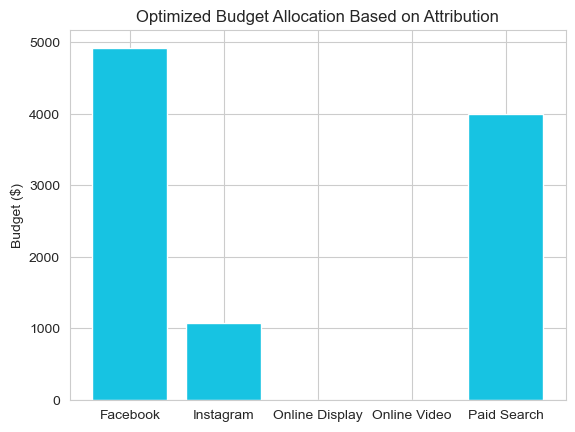

{'Facebook': 4923.01, 'Instagram': 1081.04, 'Online Display': 0.0, 'Online Video': 0.0, 'Paid Search': 3995.95}


In [69]:
allocation = allocate_budget(objective=non_lin_objective, budget_total=budget_total)
print(allocation)